In [1]:
%%bash

sudo apt update
sudo apt install -y git-lfs
pip install -U huggingface_hub hf_transfer
git lfs install

Get:1 https://download.docker.com/linux/ubuntu noble InRelease [48.5 kB]
Hit:2 https://packages.microsoft.com/repos/azure-cli noble InRelease
Get:3 https://nvidia.github.io/libnvidia-container/stable/deb/arm64  InRelease [1477 B]
Get:4 https://download.docker.com/linux/ubuntu noble/stable arm64 Packages [44.1 kB]
Ign:5 http://linux.mellanox.com/public/repo/doca/2.9.3/ubuntu24.04/arm64-sbsa ./ InRelease
Get:6 http://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu noble InRelease [17.8 kB]
Hit:7 http://ports.ubuntu.com/ubuntu-ports noble InRelease
Hit:8 http://archive.lambdalabs.com/ubuntu noble InRelease
Hit:9 https://pkg.cloudflare.com/cloudflared noble InRelease
Get:10 http://ports.ubuntu.com/ubuntu-ports noble-updates InRelease [126 kB]
Hit:11 http://linux.mellanox.com/public/repo/doca/2.9.3/ubuntu24.04/arm64-sbsa ./ Release
Get:13 http://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu noble/main arm64 Packages [33.7 kB]
Get:14 http://ports.ubuntu.com/ubuntu-ports noble-backports InRel

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 170 not upgraded.
Need to get 3570 kB of archives.
After this operation, 11.2 MB of additional disk space will be used.
Get:1 http://ports.ubuntu.com/ubuntu-ports noble-updates/universe arm64 git-lfs arm64 3.4.1-1ubuntu0.3 [3570 kB]


dpkg-preconfigure: unable to re-open stdin: No such file or directory


Fetched 3570 kB in 0s (23.4 MB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 210112 files and directories currently installed.)
Preparing to unpack .../git-lfs_3.4.1-1ubuntu0.3_arm64.deb ...
Unpacking git-lfs (3.4.1-1ubuntu0.3) ...
Setting up git-lfs (3.4.1-1ubuntu0.3) ...
Processing triggers for man-db (2.12.0-4build2) ...



Running kernel seems to be up-to-date.

No services need to be restarted.

No containers need to be restarted.

No user sessions are running outdated binaries.

No VM guests are running outdated hypervisor (qemu) binaries on this host.


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 30.8 MB/s eta 0:00:00a 0:00:01
Git LFS initialized.


In [19]:
!pip install -U transformers accelerate peft safetensors pillow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.4 MB/s eta 0:00:00a 0:00:01


In [20]:
!pip install flash-attn --no-build-isolation

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# %%bash
# export HF_HUB_ENABLE_HF_TRANSFER=1
%env HF_HUB_ENABLE_HF_TRANSFER=1

env: HF_HUB_ENABLE_HF_TRANSFER=1


In [6]:
%env HF_ENDPOINT=https://huggingface.co

env: HF_ENDPOINT=https://huggingface.co


In [7]:
!echo $HF_HUB_ENABLE_HF_TRANSFER

1


In [8]:
!echo $HF_ENDPOINT

https://huggingface.co


In [9]:
# %%bash
# !huggingface-cli login
!hf auth login

User is already logged in.


In [5]:
!pip install -U diffusers

Defaulting to user installation because normal site-packages is not writeable


In [6]:
pip install -U diffusers transformers accelerate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
# huggingface-cli download fal/Qwen-Image-Edit-2511-Multiple-Angles-LoRA \
#     --local-dir ./models/qwen-image-edit-lora

!hf download dx8152/Qwen-Edit-2509-Multiple-angles \
    --local-dir ./models/qwen-multiple-angles-2509/qwen-image-edit-lora

Fetching 4 files: 100%|███████████████████████████| 4/4 [00:00<00:00, 32.30it/s]
Download complete: : 49.0kB [00:00, 391kB/s]              /home/ubuntu/models/qwen-multiple-angles-2509/qwen-image-edit-lora
Download complete: : 49.0kB [00:00, 358kB/s]


In [28]:
# huggingface-cli download Qwen/Qwen2.5-VL-7B-Instruct \
#   --local-dir ./models/qwen-base \
#   --local-dir-use-symlinks False

# !hf download Qwen/Qwen2.5-VL-7B-Instruct \
#     --local-dir ./models/qwen-base

!hf download Qwen/Qwen-Image-Edit-2509 \
    --local-dir ./models/qwen-multiple-angles-2509/qwen-base

Fetching 35 files: 100%|████████████████████████| 35/35 [00:01<00:00, 19.31it/s]
Download complete: : 12.1kB [00:01, 6.65kB/s]             /home/ubuntu/models/qwen-multiple-angles-2509/qwen-base
Download complete: : 12.1kB [00:01, 6.60kB/s]


## Pipe to Qwen Multiple Angles Model

In [10]:
import torch
from diffusers import DiffusionPipeline
from diffusers.utils import load_image

base_model_path = "./models/qwen-multiple-angles-2509/qwen-base"
lora_path = "./models/qwen-multiple-angles-2509/qwen-image-edit-lora"

# switch to "mps" for apple devices
# pipe = DiffusionPipeline.from_pretrained("Qwen/Qwen-Image-Edit-2511", torch_dtype=torch.bfloat16, device_map="cuda")
pipe = DiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.bfloat16,
    device_map="cuda")

/home/ubuntu/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights:  68%|██████▊   | 493/729 [00:01<00:00, 460.90it/s, Materializing param=model.visual.blocks.12.mlp.up_proj.weight]
IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)


Loading pipeline components...: 100%|██████████| 6/6 [00:08<00:00,  1.40s/it]


In [11]:
print(lora_path)

./models/qwen-multiple-angles-2509/qwen-image-edit-lora


In [12]:
# pipe.load_lora_weights("fal/Qwen-Image-Edit-2509-Multiple-Angles-LoRA")
pipe.load_lora_weights(lora_path)

## Test with frontGrille at frame 0

In [13]:
# prompt = "View the front of the grille plate of the car, and remove the person."
prompt = "Remove human and move to the front of the car."
input_image = load_image("https://datara04749.blob.core.windows.net/roboteyeview/automotive/bmw/frontGrille/orig/frontGrille_000.png")

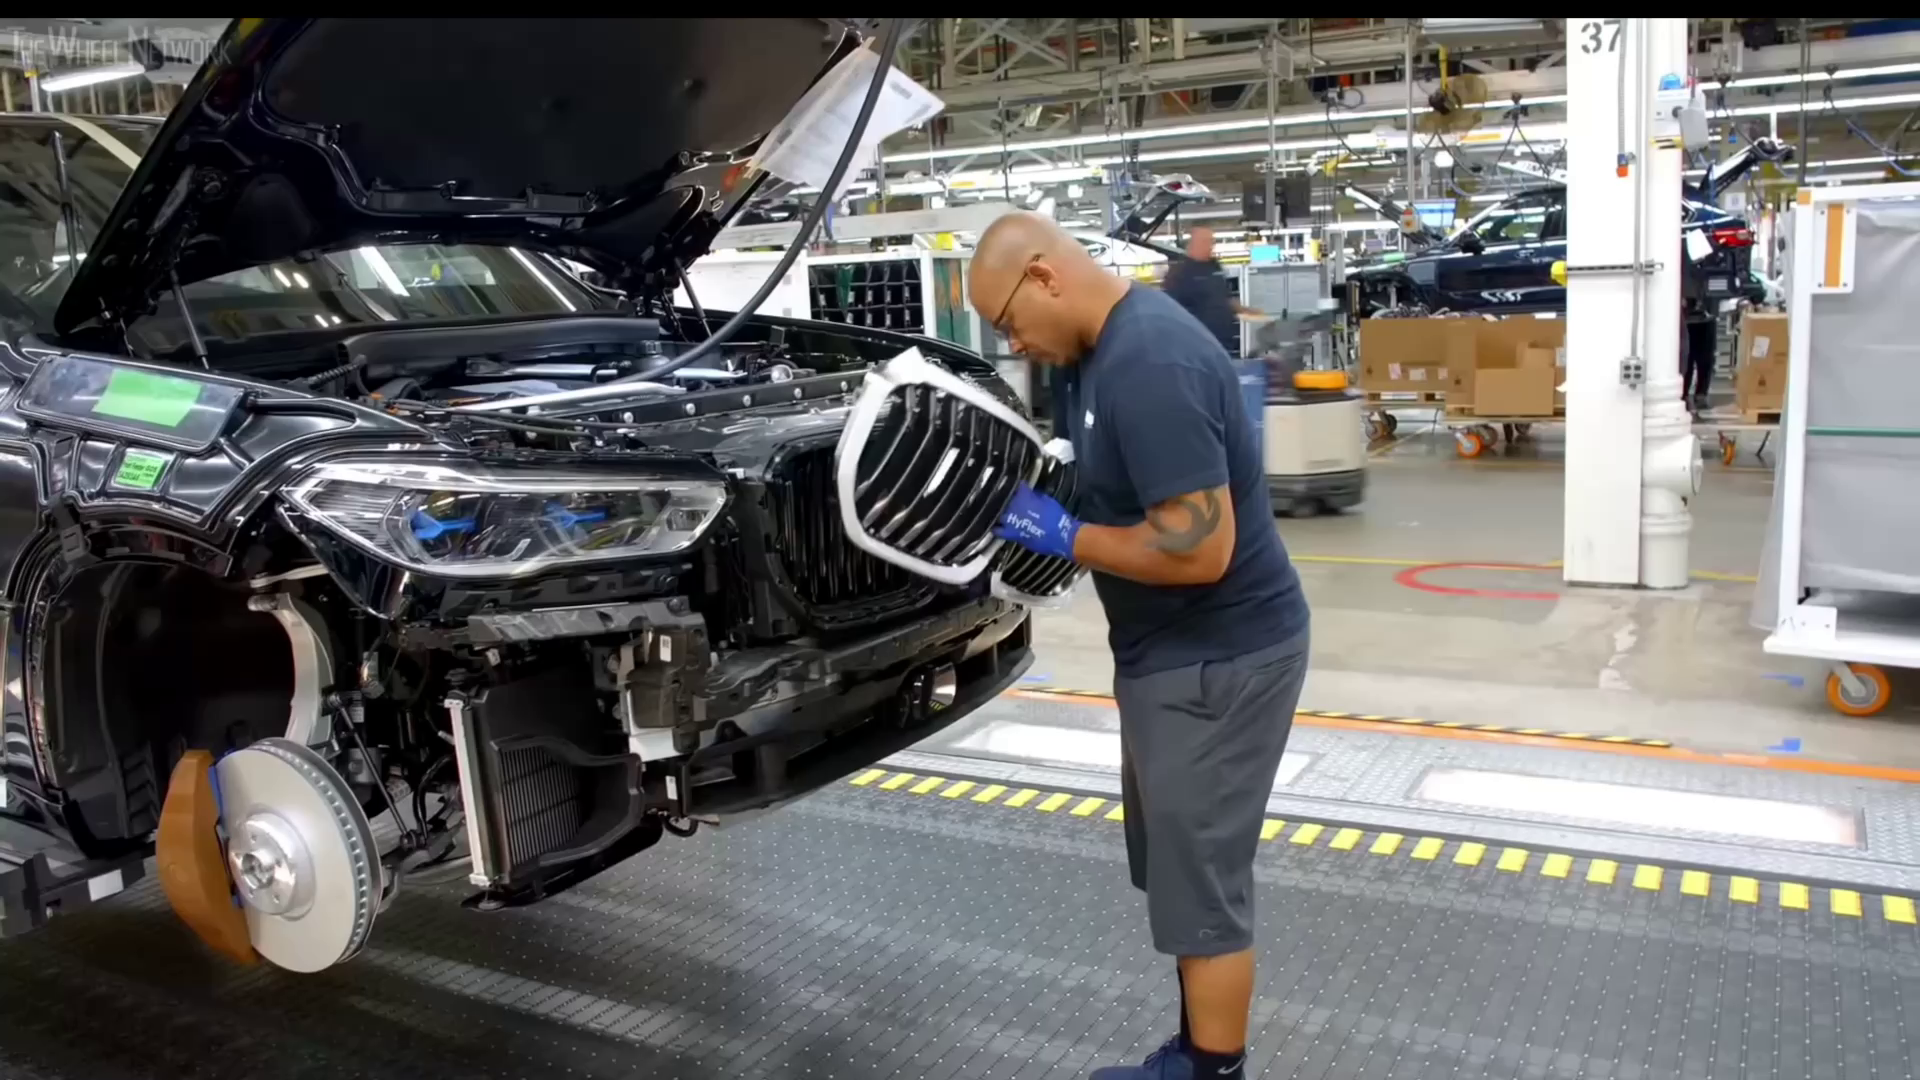

In [14]:
input_image

In [15]:
output = pipe(image=input_image, prompt=prompt)

true_cfg_scale is passed as 4.0, but classifier-free guidance is not enabled since no negative_prompt is provided.
100%|██████████| 50/50 [00:25<00:00,  1.98it/s]


In [16]:
image = output.images[0]

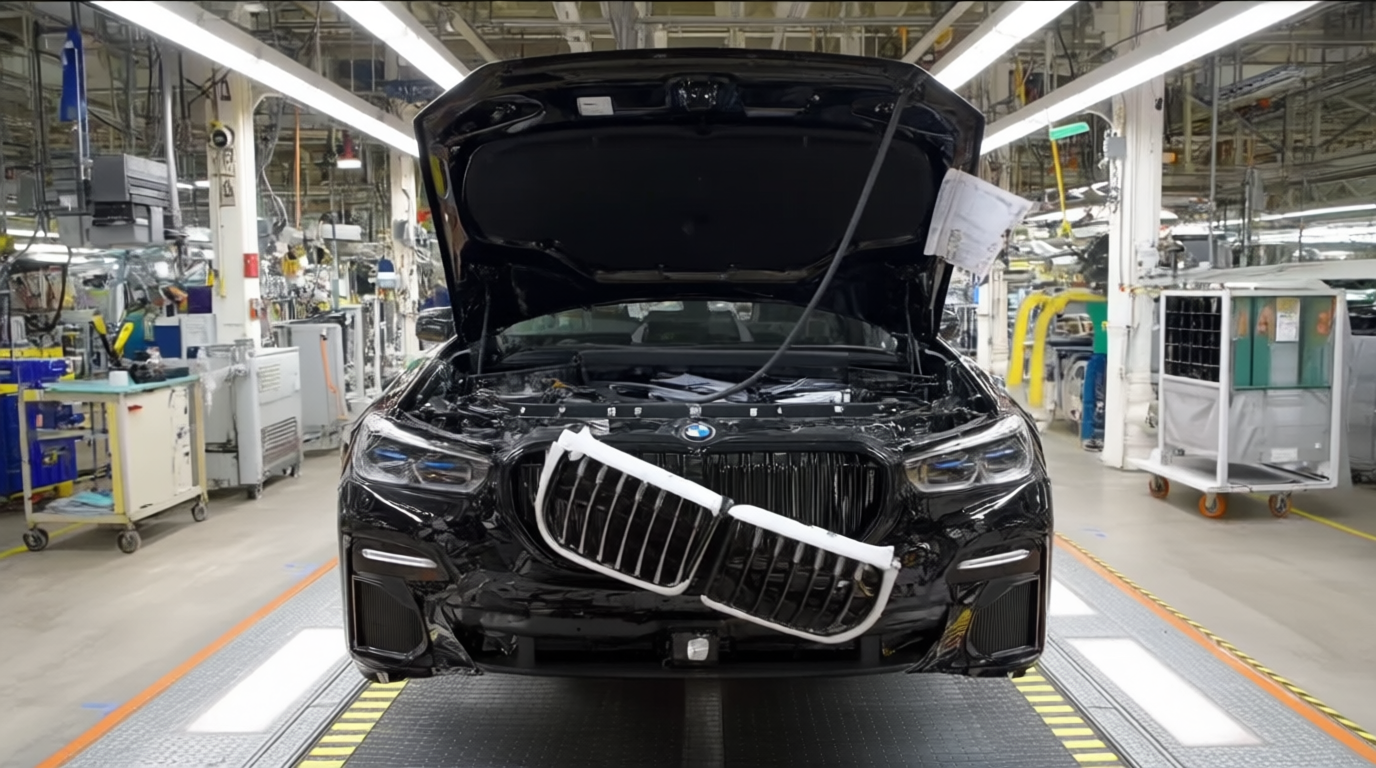

In [17]:
image